In [1]:
# import necessary libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Exe 1

In [7]:
# simulation parameters
N = 55
nIterations = 1000

In [8]:
# the data and its mean
theData = np.random.normal(loc=0,scale=1,size=N)**2 - 1
theMean = np.mean(theData)

In [9]:
# one permutation test
permMeans = np.zeros(nIterations)
for permi in range(nIterations):

  # the data with random sign flips
  signFlippedData = np.sign(np.random.randn(N))*theData

  # and its mean
  permMeans[permi] = np.mean( signFlippedData )

In [10]:
# zscore relative to H0 distribution
zVal = (theMean-np.mean(permMeans)) / np.std(permMeans,ddof=1)
pVal = (1-stats.norm.cdf(np.abs(zVal)))*2     


In [11]:
# print the z/p values
print(f'z = {zVal:.2f}, p = {pVal:.3f}')


z = 1.07, p = 0.284


In [15]:
# simulation parameters 
N = 55
nPermTests = 750
nIterations = 1000

In [16]:
# data and mean
theData = np.random.normal(loc=0,scale=1,size=N)**2 - 1
theMean = np.mean(theData)


In [17]:
# initialize output vector
zVals = np.zeros(nPermTests)

In [18]:
# loop over all the permutation tests
for ni in range(nPermTests):

  # permutation testing 
  permMeans = np.zeros(nIterations)
  for permi in range(nIterations):
    permMeans[permi] = np.mean( np.sign(np.random.randn(N))*theData )

  # zscore relative to H0 distribution
  zVals[ni] = (theMean-np.mean(permMeans)) / np.std(permMeans,ddof=1)


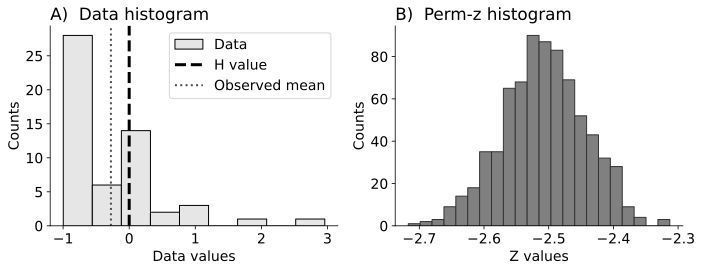

In [19]:
# plot
_,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].hist(theData,bins='fd',color=(.9,.9,.9),edgecolor='k',label='Data')
axs[0].axvline(x=0,color='k',linestyle='--',linewidth=3,label=r'H value')
axs[0].axvline(x=theMean,color=(.3,.3,.3),linestyle=':',linewidth=2,label='Observed mean')
axs[0].set(xlabel='Data values',ylabel='Counts')
axs[0].legend()
axs[0].set_title(r'A)  Data histogram')

axs[1].hist(zVals,bins='fd',color=(.5,.5,.5),edgecolor=(.2,.2,.2))
axs[1].set(xlabel='Z values',ylabel='Counts')
axs[1].set_title(r'B)  Perm-z histogram')

# display the figure
plt.tight_layout()
plt.show()